In [1]:
import os
try:                  # get to root of project
    print(od)
except NameError:
    od = os.getcwd()
    
os.chdir(od + '/..')
print(os.getcwd())

/home/mike/py/mylib/ChemCupid


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams, plot, scatter

from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, Ticker, FixedTicker, Arrow, VeeHead

import numpy as np
np.random.seed(1337)
import pandas as pd
import glob as glob
import bs4 as bs
import json
import re

import pubchempy as pc

from collections import Hashable
from hashlib import md5

import tqdm


In [3]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
output_notebook()

Loading BokehJS ...

In [5]:
def vdist(vec, ary):
    return np.sum((ary-vec)**2, axis=1)**0.5

def scatter_label(xy, labels, color=None):
    ax = plt.axes()
    ax.scatter(xy[:,0], xy[:,1])

    for i, txt in enumerate(labels):
        ax.annotate(txt, (xy[i,0], xy[i,1]), color=color)
        
def bscatter_label(xy, labels, size=5, color=None, fontsize=15, p=None):
    p = figure() if p is None else p
    source = ColumnDataSource(data={'x':xy[:,0], 'y':xy[:,1], 'labels':labels})

    p.scatter(x='x', y='y', size=size, source=source)
    labels = LabelSet(x='x', y='y', text='labels', level='glyph', text_font_size='{}pt'.format(fontsize),
              source=source, render_mode='canvas')
    p.add_layout(labels)
    return p

In [6]:
basedir = '/home/mike/data/chemistry/compatibility/'
files = glob.glob(basedir + 'parsed/' + '*.csv')
files

['/home/mike/data/chemistry/compatibility/parsed/Graco_ChemCompGuidecsv.csv',
 '/home/mike/data/chemistry/compatibility/parsed/ColeParmerRaw02.csv',
 '/home/mike/data/chemistry/compatibility/parsed/tabula-Chemical-Resistance-Chart.csv']

In [7]:
frames = [pd.read_csv(fn) for fn in files]
for frame in frames:
    frame.columns = map(str.lower, frame.columns)
n = 0
print(frames[n].shape)
frames[n].head()

(1669, 21)


,chemical,aluminum,carbon steel,cast/ductile iron,304 stainless steel,316 stainless steel,acetal,buna,csm (hypalon),"epr, epdm",...,fluoroelastomer (fkm),nitrile (tpe),nylon,polychloroprene,polypropylene,ptfe,pvdf,santoprene (epdm & polypropylene),uhmwpe,urethane
0,Acetaldehyde,B,D,C,A,A,A,D,C,A,...,D,D,B,D,C,A,D,B,B,D
1,Acetamide,A,D,D,D,A,A,B,B,A,...,B,A,B,B,A,A,D,A,A,D
2,Acetate Solvents,B,D,D,D,A,A,D,C,B,...,D,D,A,D,D,A,D,B,B,D
3,Acetic Acid,B,D,D,D,B,D,C,C,A,...,C,C,D,C,B,A,C,C,B,C
4,Acetic Acid — 20%,B,D,D,B,A,C,C,A,A,...,B,-,D,B,B,A,B,B,A,-


In [8]:
n = 1
print(frames[n].shape)
frames[n].head()

(584, 39)


,chemical,hypalon,pvc,ldpe,kalrez,polyetherether ketone (peek),viton,abs plastic,kel-f,cpvc,...,carbon graphite,acetal (delrin),epdm,stainless steel - 316,ceramic al203,bronze,silicone,polyurethane,neoprene,polypropylene
0,Acetaldehyde,C,D,C,A,A,D,D,A,D,...,A,A,A,A,NaN,A,A,D,C,A
1,Acetamide,B,D,A,A,NaN,B,NaN,A,NaN,...,A,A,A,A,NaN,D,B,D,B,A
2,Acetate Solvent,C,D,A,C,NaN,D,NaN,A,C,...,A,NaN,A,A,NaN,C,C,D,D,B
3,Acetic Acid,C,D,A,C,A,B,D,A,C,...,A,D,A,B,A,C,C,D,C,B
4,Acetic Acid 20%,A,D,A,A,A,B,C,A,A,...,A,C,A,A,A,C,B,D,A,A


In [9]:
n = 2
print(frames[n].shape)
frames[n].head()

(493, 33)


,chemical,302 stainless steel,304 stainless steel,316 stainless steel,440 stainless steel,aluminum,titanium,hastelloy c,cast bronze,brass,...,carbon,ceramic,ceramagnet a,viton,buna-n (nitrile),silicon,neoprene,epdm,natural rubber,epoxy
0,Acetaldehyde 5,A,A,A,-,B,A,A,D,-,...,A,A,-,D,B,B,D,B,C,A
1,Acetamide,-,B,A,-,-,-,-,-,-,...,-,A,-,A,A,-,A,A,D,A
2,Acetate Solv. 2,A,B,A,B,B,-,-,A,C,...,A,A,-,D,D,-,D,-,-,A
3,"Acetic Acid, Glacia 1",-,B,A,A,B,A,A,C,C,...,A,A,-,D,D,B,C,B,C,B
4,Acetic Acid 20%,-,B,A,-,-,A,A,-,C,...,-,A,-,A,C,-,C,-,-,B


Tabula conversion is kinda junk. 

In [10]:
print(frames[0].columns)
print(frames[1].columns)

Index(['chemical', 'aluminum', 'carbon steel', 'cast/ductile iron',
       '304 stainless steel', '316 stainless steel', 'acetal', 'buna',
       'csm (hypalon)', 'epr, epdm', 'fluorocarbon', 'fluoroelastomer (fkm)',
       'nitrile (tpe)', 'nylon', 'polychloroprene', 'polypropylene', 'ptfe',
       'pvdf', 'santoprene (epdm & polypropylene)', 'uhmwpe', 'urethane'],
      dtype='object')
Index(['chemical', 'hypalon', 'pvc', 'ldpe', 'kalrez',
       'polyetherether ketone (peek)', 'viton', 'abs plastic', 'kel-f', 'cpvc',
       'fluorocarbon (fkm)', 'copper', 'ptfe', 'polycarbonate', 'tygon',
       'aluminum', 'stainless steel - 304', 'cast iron', 'buna n (nitrile)',
       'chemraz (ffkm)', 'hastelloy-c', 'brass', 'nylon', 'carbon steel',
       'epoxy', 'titanium', 'pvdf (kynar)', 'natural rubber', 'ceramic magnet',
       'carbon graphite', 'acetal (delrin)', 'epdm', 'stainless steel - 316',
       'ceramic al203', 'bronze', 'silicone', 'polyurethane', 'neoprene',
       'polypropyl

now have to get the columns to merge with the same names

In [11]:
ddict = {#'fluorocarbon (fkm)': 'fluoroelastomer (fkma)',
        '316 stainless steel': 'ss316', 'stainless steel - 316': 'ss316',
         '304 stainless steel': 'ss304', 'stainless steel - 304': 'ss304',
         'buna': 'buna', 'buna n (nitrile)': 'buna', 'buna-n (nitrile)': 'buna',
         'pvdf (kynar)': 'pvdf',
         'teflon': 'ptfe',
         'acetal (delrin)': 'acetal', 'polyacetal': 'acetal',
         'polyurethane': 'urethane',
         'cast/ductile iron': 'cast iron',
         'polyetherether ketone (peek)': 'peek',
         'hastelloy c': 'hastelloy-c',
         'epr, epdm': 'epdm',
         'santoprene (epdm & polypropylene)': 'santoprene',
         'polypropylene': 'pp'
        }

for frame in frames:
    frame.rename(columns=ddict, inplace=True)

In [12]:
print(frames[0].columns)
print(frames[1].columns)
print(frames[2].columns)

Index(['chemical', 'aluminum', 'carbon steel', 'cast iron', 'ss304', 'ss316',
       'acetal', 'buna', 'csm (hypalon)', 'epdm', 'fluorocarbon',
       'fluoroelastomer (fkm)', 'nitrile (tpe)', 'nylon', 'polychloroprene',
       'pp', 'ptfe', 'pvdf', 'santoprene', 'uhmwpe', 'urethane'],
      dtype='object')
Index(['chemical', 'hypalon', 'pvc', 'ldpe', 'kalrez', 'peek', 'viton',
       'abs plastic', 'kel-f', 'cpvc', 'fluorocarbon (fkm)', 'copper', 'ptfe',
       'polycarbonate', 'tygon', 'aluminum', 'ss304', 'cast iron', 'buna',
       'chemraz (ffkm)', 'hastelloy-c', 'brass', 'nylon', 'carbon steel',
       'epoxy', 'titanium', 'pvdf', 'natural rubber', 'ceramic magnet',
       'carbon graphite', 'acetal', 'epdm', 'ss316', 'ceramic al203', 'bronze',
       'silicone', 'urethane', 'neoprene', 'pp'],
      dtype='object')
Index(['chemical', '302 stainless steel', 'ss304', 'ss316',
       '440 stainless steel', 'aluminum', 'titanium', 'hastelloy-c',
       'cast bronze', 'brass', 'cast i

In [13]:
sorted(list(set([*frames[0].columns, *frames[1].columns, *frames[2].columns])))

['302 stainless steel',
 '440 stainless steel',
 'abs plastic',
 'acetal',
 'aluminum',
 'brass',
 'bronze',
 'buna',
 'carbon',
 'carbon graphite',
 'carbon steel',
 'cast bronze',
 'cast iron',
 'ceramagnet a',
 'ceramic',
 'ceramic al203',
 'ceramic magnet',
 'chemical',
 'chemraz (ffkm)',
 'copper',
 'cpvc',
 'csm (hypalon)',
 'cycloac (abs)',
 'epdm',
 'epoxy',
 'fluorocarbon',
 'fluorocarbon (fkm)',
 'fluoroelastomer (fkm)',
 'hastelloy-c',
 'hypalon',
 'kalrez',
 'kel-f',
 'kynar',
 'ldpe',
 'natural rubber',
 'neoprene',
 'nitrile (tpe)',
 'noryl',
 'nylon',
 'peek',
 'polycarbonate',
 'polychloroprene',
 'polyethylene',
 'pp',
 'ptfe',
 'pvc',
 'pvc (type 1)',
 'pvdf',
 'ryton',
 'santoprene',
 'silicon',
 'silicone',
 'ss304',
 'ss316',
 'titanium',
 'tygon',
 'tygon (e-3606)',
 'uhmwpe',
 'urethane',
 'viton']

In [14]:
frames[2].head(20)

,chemical,302 stainless steel,ss304,ss316,440 stainless steel,aluminum,titanium,hastelloy-c,cast bronze,brass,...,carbon,ceramic,ceramagnet a,viton,buna,silicon,neoprene,epdm,natural rubber,epoxy
0,Acetaldehyde 5,A,A,A,-,B,A,A,D,-,...,A,A,-,D,B,B,D,B,C,A
1,Acetamide,-,B,A,-,-,-,-,-,-,...,-,A,-,A,A,-,A,A,D,A
2,Acetate Solv. 2,A,B,A,B,B,-,-,A,C,...,A,A,-,D,D,-,D,-,-,A
3,"Acetic Acid, Glacia 1",-,B,A,A,B,A,A,C,C,...,A,A,-,D,D,B,C,B,C,B
4,Acetic Acid 20%,-,B,A,-,-,A,A,-,C,...,-,A,-,A,C,-,C,-,-,B
5,Acetic Acid 80%,-,B,A,-,-,A,A,-,C,...,-,A,-,A,C,-,D,-,-,B
6,Acetic Acid,-,B,A,B,B,A,A,C,C,...,A,A,-,C,C,-,C,B,C,A
7,Acetic Anhydride,B,A,A,B,B,A,A,C,D,...,A,A,-,D,A,C,B,B,C,A
8,Acetone 6,A,A,A,B,A,A,A,A,A,...,A,A,A,D,D,B,C,A,D,B
9,Acetyl Chloride,-,C,A,-,-,-,-,D,-,...,-,-,-,A,-,-,-,-,A,A


In [15]:
for frame in frames:
    frame.set_index('chemical', inplace=True)

frames[0].head()

,aluminum,carbon steel,cast iron,ss304,ss316,acetal,buna,csm (hypalon),epdm,fluorocarbon,fluoroelastomer (fkm),nitrile (tpe),nylon,polychloroprene,pp,ptfe,pvdf,santoprene,uhmwpe,urethane
chemical,,,,,,,,,,,,,,,,,,,,
Acetaldehyde,B,D,C,A,A,A,D,C,A,D,D,D,B,D,C,A,D,B,B,D
Acetamide,A,D,D,D,A,A,B,B,A,B,B,A,B,B,A,A,D,A,A,D
Acetate Solvents,B,D,D,D,A,A,D,C,B,D,D,D,A,D,D,A,D,B,B,D
Acetic Acid,B,D,D,D,B,D,C,C,A,-,C,C,D,C,B,A,C,C,B,C
Acetic Acid — 20%,B,D,D,B,A,C,C,A,A,C,B,-,D,B,B,A,B,B,A,-


In [16]:
for frame in frames:
    frame.replace('-', np.nan, inplace=True)
    print(frame[frame.columns[0]].unique())

['B' 'A' 'D' nan 'C']
['C' 'B' 'A' nan 'D']
['A' nan 'B' 'C' 'D']


In [17]:
labs = {'A': 4, 'B': 3, 'C': 2, 'D': 1, np.NaN: 0}

In [18]:
df = frames[0]

In [19]:
def get_label_columns(mydf):
    labs = {'A': 4, 'B': 3, 'C': 2, 'D': 1, np.NaN: 0}
    lb = preprocessing.LabelBinarizer()
    lb.fit(mydf[mydf.columns[0]].replace(labs))
    cols = [col.replace(labs) for name, col in mydf.iteritems()]
    try:
        cols = [lb.transform(col) for col in cols]
    except ValueError:
        s = set()
        for name, col in mydf.iteritems():
            s.update(set(col.unique()))
        raise ValueError('Could not map labels. Found values: {}'.format(s))
    return np.stack(cols, axis=1)

def get_column_basis(mydf):
    ary3d = get_label_columns(mydf)
    nx0, nx1, nx2 = ary3d.shape
    ary3d = ary3d.swapaxes(0,1)
    ary3d = ary3d.reshape(nx1, -1)
    return ary3d


In [20]:
tary = get_column_basis(df)
tary.shape

(20, 8345)

In [21]:
lb = preprocessing.LabelBinarizer()
lb.fit(df[df.columns[0]].replace(labs))
lb.classes_

array([0, 1, 2, 3, 4])

In [22]:
lb.transform(df[df.columns[0]].replace(labs))

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [23]:
cols = [col.replace(labs) for name, col in df.iteritems()]
cols = [lb.transform(col) for col in cols]

In [24]:
print(np.stack(cols, axis=1).shape)
nx0, nx1, nx2 = np.stack(cols, axis=1).shape

(1669, 20, 5)


In [25]:
ary = np.concatenate(cols, axis=1)
ary = ary.astype(float)
ary.shape

(1669, 100)

Re-basis trick to get a vector space it terms of chemical/compat-label vs material

In [26]:
ary_mat = ary.reshape(-1, nx1, nx2)
ary_mat = ary_mat.swapaxes(0, 1)
ary_mat = ary_mat.reshape(nx1, -1)
ary_mat.shape

(20, 8345)

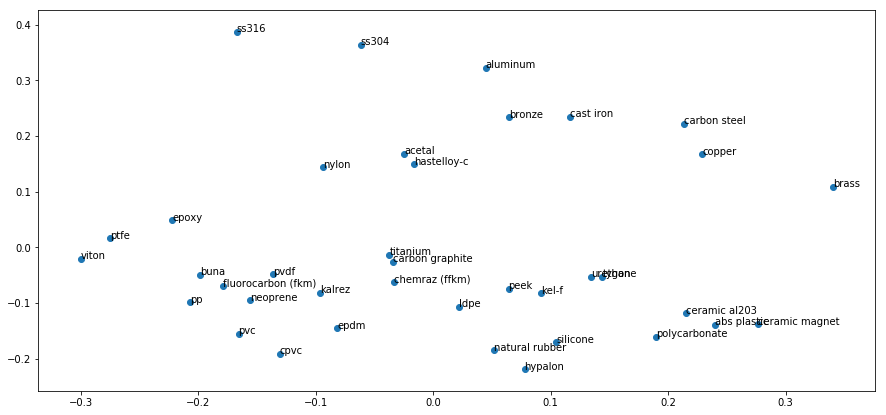

In [27]:
df = frames[1]
ary_mat = get_column_basis(df)
pca = PCA(2)
y_em = pca.fit_transform(ary_mat)
y_em = preprocessing.normalize(y_em, axis=0)

rcParams['figure.figsize'] = 15,7
scatter_label(y_em, df.columns)

In [28]:
frames[0].isnull().mean(axis=0).sort_values()

ptfe                     0.064709
polychloroprene          0.138406
fluoroelastomer (fkm)    0.190533
epdm                     0.234871
buna                     0.278011
aluminum                 0.302576
ss304                    0.319353
cast iron                0.345716
pp                       0.385860
santoprene               0.406231
ss316                    0.446974
pvdf                     0.450569
acetal                   0.470941
nitrile (tpe)            0.500899
urethane                 0.502696
nylon                    0.518274
fluorocarbon             0.559017
uhmwpe                   0.576393
carbon steel             0.647693
csm (hypalon)            0.766926
dtype: float64

#### drop junky materials with insufficient data

In [29]:
df = frames[0]
df0 = df[df.columns[df.isnull().mean(axis=0) < df['fluorocarbon'].isnull().mean()]]
df = frames[1]
df1 = df[df.columns[df.isnull().mean(axis=0) < df['abs plastic'].isnull().mean()]]
df0.head()

,aluminum,cast iron,ss304,ss316,acetal,buna,epdm,fluoroelastomer (fkm),nitrile (tpe),nylon,polychloroprene,pp,ptfe,pvdf,santoprene,urethane
chemical,,,,,,,,,,,,,,,,
Acetaldehyde,B,C,A,A,A,D,A,D,D,B,D,C,A,D,B,D
Acetamide,A,D,D,A,A,B,A,B,A,B,B,A,A,D,A,D
Acetate Solvents,B,D,D,A,A,D,B,D,D,A,D,D,A,D,B,D
Acetic Acid,B,D,D,B,D,C,A,C,C,D,C,B,A,C,C,C
Acetic Acid — 20%,B,D,B,A,C,C,A,B,NaN,D,B,B,A,B,B,NaN


In [30]:
def get_chemical_basis(mydf, n_components=2, normalize=True):
    ary_mat = get_column_basis(mydf)
    pca = PCA(n_components=n_components)
    y_em = pca.fit_transform(ary_mat)
    if normalize:
        y_em = preprocessing.normalize(y_em, axis=0)
    return y_em


In [31]:
df = df0
y_em = get_chemical_basis(df)

y_em = np.roll(y_em, 1, axis=1) # try to line it up with the other basis
p = bscatter_label(y_em, df.columns)
show(p)

In [32]:
df = df1
y_em = get_chemical_basis(df)

# rcParams['figure.figsize'] = 7,7
# scatter_label(y_em, df.columns)
p = bscatter_label(y_em, df.columns)
show(p)

### makes sense to me!

# Now on to weighted basis

the cole-parmer is still the best behaved so we will focus on that

In [33]:
df = df1

In [34]:
subval = 0.333
valmap = {'A':1, 'B': subval, np.nan:0, 'C': -subval, 'D': -1 }
vec = df.iloc[0].replace(valmap)
print(vec.shape, y_em.shape)

(34,) (34, 2)


In [35]:
accu = 0.0
for i, eig in enumerate(y_em):
    accu += eig * vec[i]
accu

array([ 0.60005966,  2.098474  ])

In [36]:
vec.as_matrix().reshape(1, -1) @ y_em

array([[ 0.60005966,  2.098474  ]])

In [37]:
ary = df.replace(valmap).as_matrix()
ary.shape

(584, 34)

In [38]:
chembed = ary @ y_em

In [39]:
p = bscatter_label(chembed, df.index, fontsize=10)
show(p)

In [40]:
df2 = pd.read_csv(basedir + 'proc2/cpcid.csv', index_col='chemical')
df2.drop('cid', axis=1, inplace=True)
df2.head()

,Hypalon,PVC,LDPE,Kalrez,Polyetherether Ketone (PEEK),Viton,ABS plastic,Kel-F,CPVC,Fluorocarbon (FKM),...,Carbon graphite,Acetal (Delrin),EPDM,stainless steel - 316,Ceramic Al203,Bronze,Silicone,Polyurethane,Neoprene,Polypropylene
chemical,,,,,,,,,,,,,,,,,,,,,
acetaldehyde,C,D,C,A,A,D,D,A,D,D,...,A,A,A,A,NaN,A,A,D,C,A
acetamide,B,D,A,A,NaN,B,NaN,A,NaN,B,...,A,A,A,A,NaN,D,B,D,B,A
acetic acid,C,D,A,C,A,B,D,A,C,D,...,A,D,A,B,A,C,C,D,C,B
"acetic acid, glacial",C,D,D,C,NaN,D,D,A,B,D,...,A,D,B,A,A,C,B,D,D,A
acetic anhydride,A,D,D,A,NaN,D,C,A,D,D,...,A,D,B,A,A,C,C,D,A,B


In [41]:
df2.isnull().mean(axis=0).sort_values()
df2 = df2[df2.columns[df2.isnull().mean(axis=0).sort_values() < .5]]

In [42]:
df = df2
y_em = get_chemical_basis(df, n_components=3)
p = bscatter_label(y_em, df.columns, fontsize=10)
# output_file('/home/mike/data/chembed-cp-mat-01.html')
show(p)

In [43]:
vec = df.iloc[0].replace(valmap)
print(vec.shape, y_em.shape)

(35,) (35, 3)


In [44]:
ary = df.replace(valmap).as_matrix()
chembed = ary @ y_em

In [45]:
p = bscatter_label(chembed, df.index, fontsize=10)
show(p)

### beautiful!

missing a couple key things (like nitric acid) due to mixture notation, lookup misses

In [46]:
# output_file('/home/mike/data/chembed-cp-01.html')
# show(p)

### Prediction

In [47]:
# expecting a N x d output
chembed.shape, y_em.shape

((288, 3), (35, 3))

In [48]:
yp = chembed @ y_em.T
yp.shape, df.shape

((288, 35), (288, 35))

In [49]:
yf = pd.DataFrame(yp, index=df.index, columns=df.columns)
yf.head()

,Hypalon,PVC,LDPE,Kalrez,Polyetherether Ketone (PEEK),Viton,ABS plastic,Kel-F,CPVC,Fluorocarbon (FKM),...,PVDF (Kynar),Natural rubber,Ceramic magnet,Carbon graphite,Acetal (Delrin),EPDM,stainless steel - 316,Ceramic Al203,Bronze,Silicone
chemical,,,,,,,,,,,,,,,,,,,,,
acetaldehyde,-0.748355,-0.768561,-0.332408,0.393531,0.360906,-0.219767,-0.517500,0.413999,-0.642505,-0.318872,...,0.115068,-0.848384,0.081397,0.485734,0.136950,-0.429592,0.684468,0.220594,0.483496,-0.825344
acetamide,-0.327993,-0.121407,-0.167206,0.706426,0.184472,0.419899,-0.656482,0.111555,-0.126392,0.358274,...,0.380934,-0.356121,-0.506482,0.495979,0.025351,0.109461,0.426730,-0.260402,-0.006043,-0.481851
acetic acid,-0.273834,-0.304228,-0.057093,0.546787,0.553056,0.108707,-0.205644,0.570979,-0.053955,0.068282,...,0.375083,-0.517345,0.398924,0.509637,-0.141509,-0.178294,-0.244485,0.484153,-0.174433,-0.428355
"acetic acid, glacial",-0.481513,-0.576196,-0.144650,0.501923,0.638090,-0.097477,-0.231057,0.697168,-0.278249,-0.160336,...,0.310076,-0.753209,0.563339,0.560524,-0.090390,-0.378812,-0.080013,0.635772,0.026147,-0.622068
acetic anhydride,-0.694770,-0.651005,-0.286709,0.728195,0.534306,0.056207,-0.633242,0.550361,-0.462063,-0.043840,...,0.369245,-0.875867,0.058957,0.696834,0.028771,-0.307590,0.454579,0.266336,0.216248,-0.864029


In [50]:
n = 0
pd.DataFrame([df.iloc[n], yf.iloc[n]])

,Hypalon,PVC,LDPE,Kalrez,Polyetherether Ketone (PEEK),Viton,ABS plastic,Kel-F,CPVC,Fluorocarbon (FKM),...,PVDF (Kynar),Natural rubber,Ceramic magnet,Carbon graphite,Acetal (Delrin),EPDM,stainless steel - 316,Ceramic Al203,Bronze,Silicone
acetaldehyde,C,D,C,A,A,D,D,A,D,D,...,D,C,NaN,A,A,A,A,NaN,A,A
acetaldehyde,-0.748355,-0.768561,-0.332408,0.393531,0.360906,-0.219767,-0.5175,0.413999,-0.642505,-0.318872,...,0.115068,-0.848384,0.081397,0.485734,0.13695,-0.429592,0.684468,0.220594,0.483496,-0.825344


array([[ 1.        ,  0.60792234],
       [ 0.60792234,  1.        ]])

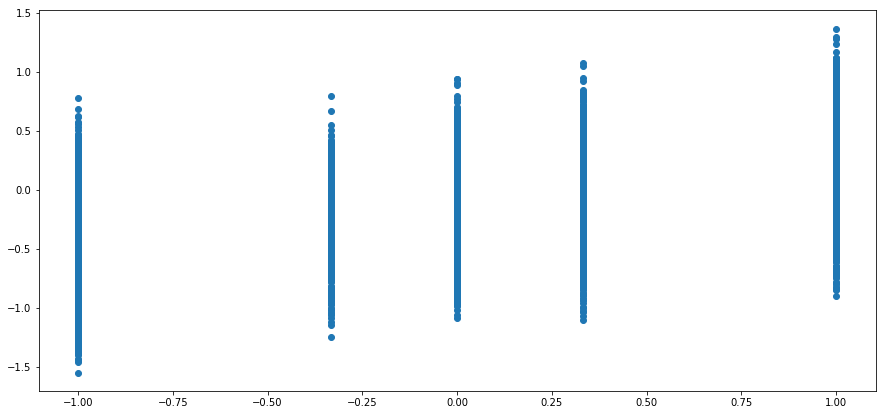

In [51]:
a1 = ary.flatten()
a2 = yp.flatten()
scatter(a1, a2)
cc = np.corrcoef(a1, a2)
cc

(70, 70)


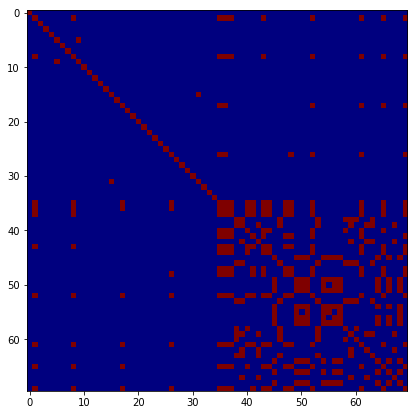

In [52]:
cc = np.corrcoef(ary.T, yp.T)
print(cc.shape)
plt.imshow(cc > 0.7, cmap='jet')

#### gross, why is the correlation so bad? Clearly some materials are more predictable than others

In [53]:
devs = df.replace(valmap).std()
ccs = []

for mat in df.columns:
    a1 = df[mat].replace(valmap)
    a2 = yf[mat]
    cc = np.corrcoef(a1, a2)
#     print('{:.3f} {:.3f} {}'.format(cc[0,1], devs[mat], mat))
    ccs.append(cc[0,1])
    
ccs = pd.Series(ccs, index=df.columns)
pd.DataFrame([ccs, devs]).T

,0,1
Hypalon,0.692188,0.761572
PVC,0.759264,0.821033
LDPE,0.578588,0.669664
Kalrez,0.405934,0.354245
Polyetherether Ketone (PEEK),0.297016,0.532580
Viton,0.619418,0.760507
ABS plastic,0.636026,0.653140
Kel-F,0.405948,0.525197
CPVC,0.745132,0.796200
Fluorocarbon (FKM),0.648318,0.801700


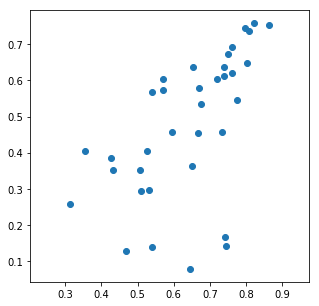

In [54]:
rcParams['figure.figsize'] = 5,5
plt.axis('equal')
scatter(devs, ccs)

#### pretty sure my prediction method of matmul is kinda working, but the variance of the values is screwing it up 
or any number of other potential screwups

simple MLP: 

features: (d chembed vec) & (d material vec)

samples: n * d

In [55]:
y_src = df.replace(valmap).as_matrix()

xvecs = []
for i, chemvec in enumerate(chembed):
    xrow = []
    for j, matvec in enumerate(y_em):
        xrow.append([*chemvec, *matvec])
    xvecs.append(xrow)
    
xvecs = np.array(xvecs)
nx0, nx1, nx2 = xvecs.shape
xvecs.shape

(288, 35, 6)

In [56]:
xvecs = xvecs.reshape(nx0 * nx1, -1)
y_src = y_src.reshape(nx0 * nx1, -1)
xvecs.shape

(10080, 6)

In [57]:
# don't bother predicting nans
mask = y_src != 0
xvecs = xvecs[mask.ravel()]
y_src = y_src[mask]
xvecs.shape

(7756, 6)

In [58]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
mlp = MLPRegressor((10,), early_stopping=True)

In [59]:
N = xvecs.shape[0]
split = int(.8*N)
x_train = xvecs[:split]
y_train = y_src[:split]
x_test = xvecs[split:]
y_test = y_src[split:] # pretty sure there is a module for this
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
mlp.fit(x_train, y_train.ravel())

(6204, 6) (6204,) (1552, 6) (1552,)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [60]:
mlp.score(x_test, y_test.ravel())

0.48277587593230209

too much powah! also the whole nan thing is probably munging it up

In [61]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [62]:
gbr.score(x_test, y_test.ravel())

0.49488560856458191

removing the nans from the prediction values boosted score from ~36% to ~50%. 